# MNIST 데이터 분석 Baseline code

## 1. 패키지 불러오기

In [1]:
import input_data
import numpy as np
import matplotlib.pylab as plt

## 2. MNIST 데이터 둘러보기

In [2]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)  # MNIST 데이터를 불러와서 저장

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


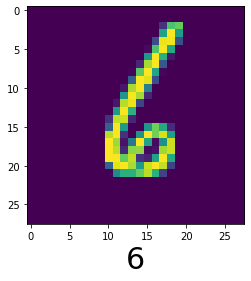

In [3]:
# 랜덤으로 25개 데이터를 뽑아서 저장, (X:이미지 , Y:정답라벨) 형태
pic,real_values = mnist_images.train.next_batch(25)   

index = 11 # 0~24 정수 입력해보기
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.xlabel(real_values[index], fontsize=30)
plt.show()

# 이미지(X)와 정답라벨(Y)가 출력됨

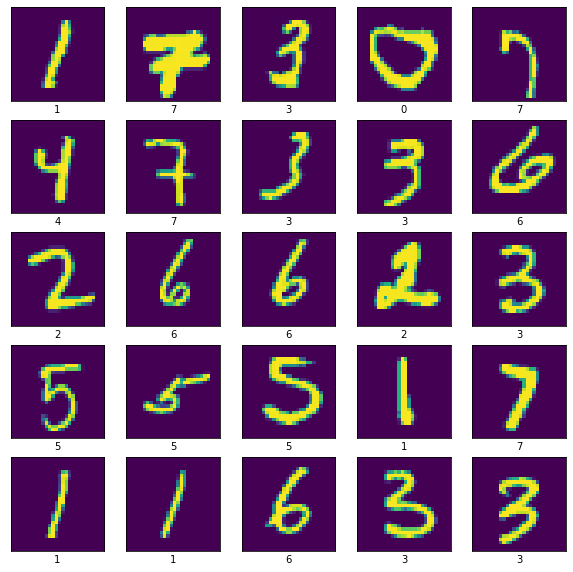

In [4]:
# 더 많이 둘러보기

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. 데이터셋 만들기

In [5]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# 데이터 개수 확인하기
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


In [9]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch: 0001 cost= 2.850673930
None
Accuracy:  0.754
Epoch: 0002 cost= 1.123906213
None
Accuracy:  0.8156
Epoch: 0003 cost= 0.904167392
None
Accuracy:  0.8375
Epoch: 0004 cost= 0.793725575
None
Accuracy:  0.8516
Epoch: 0005 cost= 0.722122194
None
Accuracy:  0.8624
Epoch: 0006 cost= 0.670846024
None
Accuracy:  0.865
Epoch: 0007 cost= 0.632012537
None
Accuracy:  0.8709
Epoch: 0008 cost= 0.600739652
None
Accuracy:  0.8763
Epoch: 0009 cost= 0.574610107
None
Accuracy:  0.8793
Epoch: 0010 cost= 0.553631884
None
Accuracy:  0.8811
Epoch: 0011 cost= 0.534609492
None
Accuracy:  0.8854
Epoch: 0012 cost= 0.518917795
None
Accuracy:  0.8866
Epoch: 0013 cost= 0.504515569
None
Accuracy:  0.8876
Epoch: 0014 cost= 0.491862673
None
Accuracy:  0.8897
Epoch: 0015 cost= 0.480659917
None
Accuracy:  0.8909


## epochs 증가 - underfitting

In [9]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 40
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 2.884731548
None
Accuracy:  0.7509
Epoch: 0002 cost= 1.145579979
None
Accuracy:  0.8129
Epoch: 0003 cost= 0.909444810
None
Accuracy:  0.8366
Epoch: 0004 cost= 0.790831481
None
Accuracy:  0.8513
Epoch: 0005 cost= 0.716107074
None
Accuracy:  0.8597
Epoch: 0006 cost= 0.662352275
None
Accuracy:  0.8663
Epoch: 0007 cost= 0.621582151
None
Accuracy:  0.8701
Epoch: 0008 cost= 0.589707193
None
Accuracy:  0.8722
Epoch: 0009 cost= 0.562798100
None
Accuracy:  0.8764
Epoch: 0010 cost= 0.540660831
None
Accuracy:  0.879
Epoch: 0011 cost= 0.521802563
None
Accuracy:  0.8807
Epoch: 0012 cost= 0.505576486
None
Accuracy:  0.8819
Epoch: 0013 cost= 0.491327077
None
Accuracy:  0.8837
Epoch: 0014 cost= 0.478515856
None
Accuracy:  0.8863
Epoch: 0015 cost= 0.467527747
None
Accuracy:  0.8872
Epoch: 0016 cost= 0.457003414
None
Accuracy:  0.8882
Epoch: 0017 cost= 0.447775241
None
Accuracy:  0.8899
Epoch: 0018 cost= 0.439686273
None
Accuracy:  0.8926
Epoch: 0019 cost= 0.431651482
None
Accuracy:  0

## batch_size 감소 - overfitting?

In [11]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 10

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 0.917793949
None
Accuracy:  0.885
Epoch: 0002 cost= 0.500838271
None
Accuracy:  0.8937
Epoch: 0003 cost= 0.431158623
None
Accuracy:  0.8989
Epoch: 0004 cost= 0.392495597
None
Accuracy:  0.9088
Epoch: 0005 cost= 0.368788407
None
Accuracy:  0.9039
Epoch: 0006 cost= 0.352063687
None
Accuracy:  0.905
Epoch: 0007 cost= 0.339653391
None
Accuracy:  0.9138
Epoch: 0008 cost= 0.328756399
None
Accuracy:  0.915
Epoch: 0009 cost= 0.320505157
None
Accuracy:  0.9107
Epoch: 0010 cost= 0.313644421
None
Accuracy:  0.916
Epoch: 0011 cost= 0.305742074
None
Accuracy:  0.9143
Epoch: 0012 cost= 0.303002859
None
Accuracy:  0.9193
Epoch: 0013 cost= 0.298149182
None
Accuracy:  0.9143
Epoch: 0014 cost= 0.294299457
None
Accuracy:  0.9151
Epoch: 0015 cost= 0.291660433
None
Accuracy:  0.9221


## Overfitting 조정 - Dropout

In [15]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

keep_prob = tf.compat.v1.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 6.2.1
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
# 6.2.1
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

##########
# 신경망 모델 학습
##########

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 6.2.3
for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # 6.2.2 -> 학습 코드 : keep_prob를 0.8로 넣어 준다.
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})

        total_cost += cost_val

    print('Epoch: ', '%04d' % (epoch+1),
          'Avg. Cost = ', '{:.3f}'.format(total_cost/total_batch))

print("최적화 완료")

##########
# 결과 확인
##########

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 6.2.2 -> 예측 코드 : keep_prob를 1로 넣어준다.
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch:  0001 Avg. Cost =  0.428
Epoch:  0002 Avg. Cost =  0.164
Epoch:  0003 Avg. Cost =  0.117
Epoch:  0004 Avg. Cost =  0.091
Epoch:  0005 Avg. Cost =  0.075
Epoch:  0006 Avg. Cost =  0.063
Epoch:  0007 Avg. Cost =  0.054
Epoch:  0008 Avg. Cost =  0.046
Epoch:  0009 Avg. Cost =  0.040
Epoch:  0010 Avg. Cost =  0.037
Epoch:  0011 Avg. Cost =  0.034
Epoch:  0012 Avg. Cost =  0.031
Epoch:  0013 Avg. Cost =  0.031
Epoch:  0014 Avg. Cost =  0.027
Epoch:  0015 Avg. Cost =  0.024
Epoch:  0016 Avg. Cost =  0.024
Epoch:  0017 Avg. Cost =  0.024
Epoch:  0018 Avg. Cost =  0.024
Epoch:  0019 Avg. Cost =  0.022
Epoch:  0020 Avg. Cost =  0.019
Epoch:  0021 Avg. Cost =  0.019
Epoch:  0022 Avg. Cost =  0.020
Epoch:  0023 Avg. Cost =  0.018
Epoch:  0024 Avg. Cost =  0.020
Epoch:  0025 Avg. Cost =  0.017
Epoch:  0026 Avg. Cost =  0.017
Epoch:  0027 Avg. Cost =  0.015
Epoch:  0028 Avg. Cos